# 最小化函数

## minimize 函数

In [1]:
%pylab inline
set_printoptions(precision=3, suppress=True)

Populating the interactive namespace from numpy and matplotlib


已知斜抛运动的水平飞行距离公式：

$d = 2 \frac{v_0^2}{g} \sin(\theta) \cos (\theta)$

- $d$ 水平飞行距离
- $v_0$ 初速度大小
- $g$ 重力加速度
- $\theta$ 抛出角度

希望找到使 $d$ 最大的角度 $\theta$。

定义距离函数：

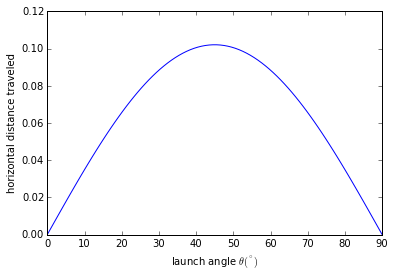

In [2]:
def dist(theta, v0):
    """calculate the distance travelled by a projectile launched
    at theta degrees with v0 (m/s) initial velocity.
    """
    g = 9.8
    theta_rad = pi * theta / 180
    return 2 * v0 ** 2 / g * sin(theta_rad) * cos(theta_rad)
theta = linspace(0,90,90)
p = plot(theta, dist(theta, 1.))
xl = xlabel(r'launch angle $\theta (^{\circ})$')
yl = ylabel('horizontal distance traveled')

因为 `Scipy` 提供的是最小化方法，所以最大化距离就相当于最小化距离的负数：

In [3]:
def neg_dist(theta, v0):
    return -1 * dist(theta, v0)

导入 `scipy.optimize.minimize`：

In [4]:
from scipy.optimize import minimize
result = minimize(neg_dist, 40, args=(1,))
print "optimal angle = {:.1f} degrees".format(result.x[0])

optimal angle = 45.0 degrees


`minimize` 接受三个参数：第一个是要优化的函数，第二个是初始猜测值，第三个则是优化函数的附加参数，默认 `minimize` 将优化函数的第一个参数作为优化变量，所以第三个参数输入的附加参数从优化函数的第二个参数开始。

查看返回结果：

In [5]:
print result

   status: 0
  success: True
     njev: 18
     nfev: 54
 hess_inv: array([[ 8110.515]])
      fun: -0.10204079220645729
        x: array([ 45.02])
  message: 'Optimization terminated successfully.'
      jac: array([ 0.])


## Rosenbrock 函数

Rosenbrock 函数是一个用来测试优化函数效果的一个非凸函数：

$f(x)=\sum\limits_{i=1}^{N-1}{100\left(x_{i+1}^2 - x_i\right) ^2 + \left(1-x_{i}\right)^2 }$

导入该函数：

In [6]:
from scipy.optimize import rosen
from mpl_toolkits.mplot3d import Axes3D

使用 `N = 2` 的 Rosenbrock 函数：

In [7]:
x, y = meshgrid(np.linspace(-2,2,25), np.linspace(-0.5,3.5,25))
z = rosen([x,y])

图像和最低点 `(1,1)`：

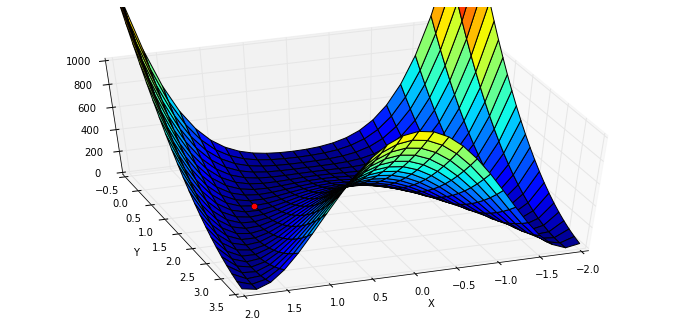

In [8]:
fig = figure(figsize=(12,5.5))
ax = fig.gca(projection="3d")
ax.azim = 70; ax.elev = 48
ax.set_xlabel("X"); ax.set_ylabel("Y")
ax.set_zlim((0,1000))
p = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap=cm.jet)
rosen_min = ax.plot([1],[1],[0],"ro")

传入初始值：

In [9]:
x0 = [1.3, 1.6, -0.5, -1.8, 0.8]
result = minimize(rosen, x0)
print result.x

[ 1.  1.  1.  1.  1.]


随机给定初始值：

In [10]:
x0 = np.random.randn(10)
result = minimize(rosen, x0)
print x0
print result.x

[ 0.815 -2.086  0.297  1.079 -0.528  0.461 -0.13  -0.715  0.734  0.621]
[-0.993  0.997  0.998  0.999  0.999  0.999  0.998  0.997  0.994  0.988]


对于 `N > 3`，函数的最小值为 $(x_1,x_2, ..., x_N) = (1,1,...,1)$，不过有一个局部极小值点 $(x_1,x_2, ..., x_N) = (-1,1,...,1)$，所以随机初始值如果选的不好的话，有可能返回的结果是局部极小值点：

## 优化方法

### BFGS 算法

`minimize` 函数默认根据问题是否有界或者有约束，使用 `'BFGS', 'L-BFGS-B', 'SLSQP'` 中的一种。

可以查看帮助来得到更多的信息：

In [11]:
info(minimize)

 minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None,
          bounds=None, constraints=(), tol=None, callback=None, options=None)

Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    Objective function.
x0 : ndarray
    Initial guess.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (Jacobian, Hessian).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead'
        - 'Powell'
        - 'CG'
        - 'BFGS'
        - 'Newton-CG'
        - 'Anneal (deprecated as of scipy version 0.14.0)'
        - 'L-BFGS-B'
        - 'TNC'
        - 'COBYLA'
        - 'SLSQP'
        - 'dogleg'
        - 'trust-ncg'
        - custom - a callable object (added in version 0.14.0)

    If not given, chosen to be one of ``BFGS``, ``L-BFGS-B``, ``SLSQP``,
    depending if the problem has constraints or bounds.
jac : bool or callable, optional
   

默认没有约束时，使用的是 [BFGS 方法](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)。

利用 `callback` 参数查看迭代的历史：

In [12]:
x0 = [-1.5, 4.5]
xi = [x0]
result = minimize(rosen, x0, callback=xi.append)
xi = np.asarray(xi)
print xi.shape
print result.x
print "in {} function evaluations.".format(result.nfev)

(37L, 2L)
[ 1.  1.]
in 200 function evaluations.


绘图显示轨迹：

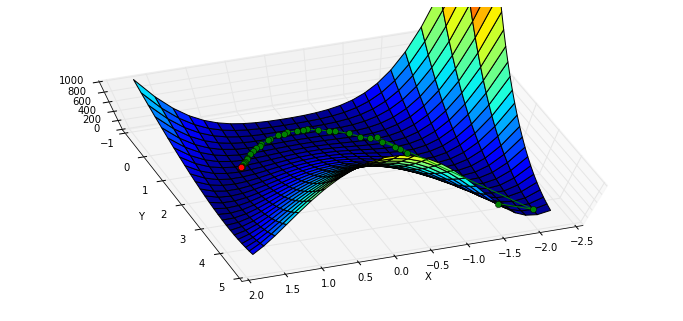

In [13]:
x, y = meshgrid(np.linspace(-2.3,1.75,25), np.linspace(-0.5,4.5,25))
z = rosen([x,y])
fig = figure(figsize=(12,5.5))
ax = fig.gca(projection="3d"); ax.azim = 70; ax.elev = 75
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlim((0,1000))
p = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap=cm.jet)
intermed = ax.plot(xi[:,0], xi[:,1], rosen(xi.T), "g-o")
rosen_min = ax.plot([1],[1],[0],"ro")

`BFGS` 需要计算函数的 Jacobian 矩阵：

给定 $\left[y_1,y_2,y_3\right] = f(x_0, x_1, x_2)$

$$J=\left[ \begin{matrix} \frac{\partial y_1}{\partial x_0} & \frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} \\\ \frac{\partial y_2}{\partial x_0} & \frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2} \\\ \frac{\partial y_3}{\partial x_0} & \frac{\partial y_3}{\partial x_1} & \frac{\partial y_3}{\partial x_2} \end{matrix} \right]$$

在我们的例子中

$$J= \left[ \begin{matrix}\frac{\partial rosen}{\partial x_0} & \frac{\partial rosen}{\partial x_1} \end{matrix} \right] $$

导入 `rosen` 函数的 `Jacobian` 函数 `rosen_der`： 

In [14]:
from scipy.optimize import rosen_der

此时，我们将 `Jacobian` 矩阵作为参数传入：

In [15]:
xi = [x0]
result = minimize(rosen, x0, jac=rosen_der, callback=xi.append)
xi = np.asarray(xi)
print xi.shape
print "in {} function evaluations and {} jacobian evaluations.".format(result.nfev, result.njev)

(38L, 2L)
in 49 function evaluations and 49 jacobian evaluations.


可以看到，函数计算的开销大约减少了一半，迭代路径与上面的基本吻合：

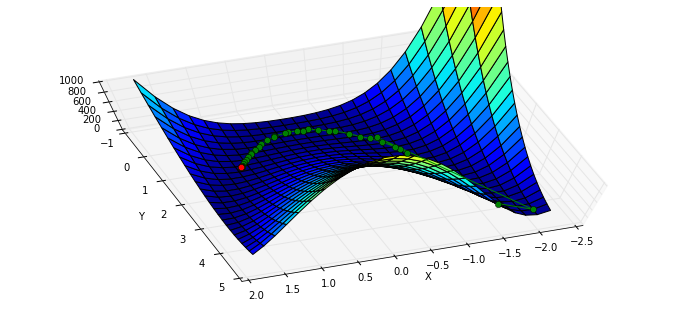

In [16]:
x, y = meshgrid(np.linspace(-2.3,1.75,25), np.linspace(-0.5,4.5,25))
z = rosen([x,y])
fig = figure(figsize=(12,5.5))
ax = fig.gca(projection="3d"); ax.azim = 70; ax.elev = 75
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlim((0,1000))
p = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap=cm.jet)
intermed = ax.plot(xi[:,0], xi[:,1], rosen(xi.T), "g-o")
rosen_min = ax.plot([1],[1],[0],"ro")

## Nelder-Mead Simplex 算法

改变 `minimize` 使用的算法，使用 [Nelder–Mead 单纯形算法](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method)：

In [17]:
xi = [x0]
result = minimize(rosen, x0, method="nelder-mead", callback = xi.append)
xi = np.asarray(xi)
print xi.shape
print "Solved the Nelder-Mead Simplex method with {} function evaluations.".format(result.nfev)

(120L, 2L)
Solved the Nelder-Mead Simplex method with 226 function evaluations.


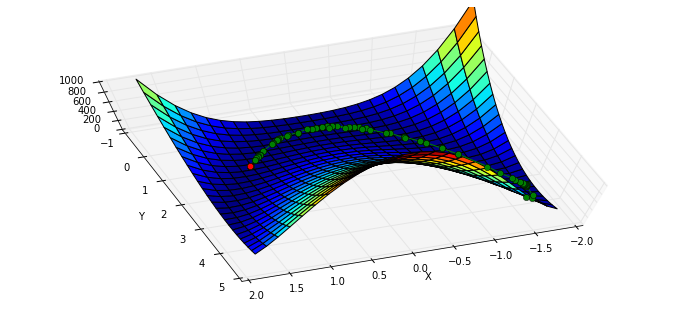

In [18]:
x, y = meshgrid(np.linspace(-1.9,1.75,25), np.linspace(-0.5,4.5,25))
z = rosen([x,y])
fig = figure(figsize=(12,5.5))
ax = fig.gca(projection="3d"); ax.azim = 70; ax.elev = 75
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlim((0,1000))
p = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap=cm.jet)
intermed = ax.plot(xi[:,0], xi[:,1], rosen(xi.T), "g-o")
rosen_min = ax.plot([1],[1],[0],"ro")

### Powell 算法

使用 [Powell 算法](https://en.wikipedia.org/wiki/Powell%27s_method)

In [19]:
xi = [x0]
result = minimize(rosen, x0, method="powell", callback=xi.append)
xi = np.asarray(xi)
print xi.shape
print "Solved Powell's method with {} function evaluations.".format(result.nfev)

(31L, 2L)
Solved Powell's method with 855 function evaluations.


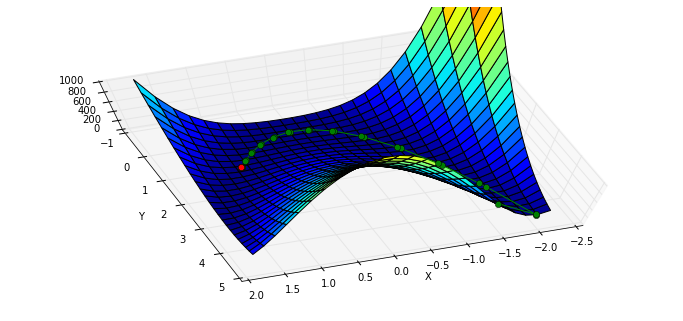

In [20]:
x, y = meshgrid(np.linspace(-2.3,1.75,25), np.linspace(-0.5,4.5,25))
z = rosen([x,y])
fig = figure(figsize=(12,5.5))
ax = fig.gca(projection="3d"); ax.azim = 70; ax.elev = 75
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlim((0,1000))
p = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap=cm.jet)
intermed = ax.plot(xi[:,0], xi[:,1], rosen(xi.T), "g-o")
rosen_min = ax.plot([1],[1],[0],"ro")